 # Auto Regressive Integrated Moving Average Model Prediction
 This is a regression model which gives a prediction and a confidence interval based off previous values over time. 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2018-01-31 to 2024-08-31
Freq: M
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   IDM_Standard_Price_UscKWh  80 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


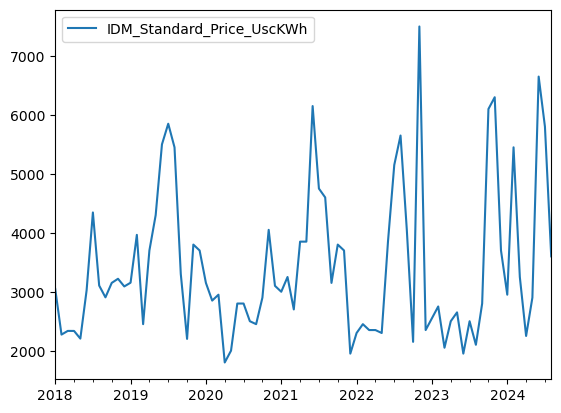

In [17]:
#Upload and read the data
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import matplotlib.pyplot as plt
file_path = r'C:\Users\apagano\Downloads\2024-2023-SAPP.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet6', usecols=['IDM_Standard_Price_UscKWh'])
start_date = '2018-01'
date_range = pd.date_range(start=start_date, periods=len(df), freq='M')
df.index = date_range # Set the generated date range as the index of the DataFrame
df.plot()
df.info()

Augmented Dickey-Fuller Test Results:
Test Statistic: -5.8294
p-value: 0.0000
Lags Used: 0
Number of Observations: 79
Critical Values:
  1%: -3.5160
  5%: -2.8989
  10%: -2.5867
Information Criteria: 1149.6981501160333


<Axes: >

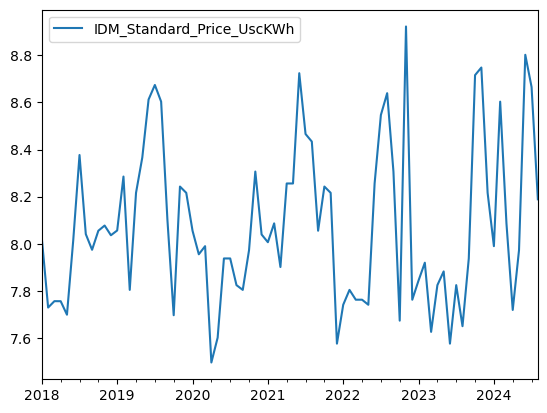

In [18]:
adf_result = adfuller(df)
adf_statistic = adf_result[0]      # Test statistic
p_value = adf_result[1]             # p-value
used_lags = adf_result[2]           # Number of lags used
n_observations = adf_result[3]      # Number of observations
critical_values = adf_result[4]     # Critical values
ic_best = adf_result[5]              # Information criteria
print("Augmented Dickey-Fuller Test Results:")
print(f"Test Statistic: {adf_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Lags Used: {used_lags}")
print(f"Number of Observations: {n_observations}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value:.4f}")
print(f"Information Criteria: {ic_best}")
df = np.log(df) # don't forget to transform the data back when making real predictions
df.plot()

Augmented Dickey-Fuller Test Results:
Test Statistic: -5.5503
p-value: 0.0000
Lags Used: 0
Number of Observations: 79
Critical Values:
  1%: -3.5160
  5%: -2.8989
  10%: -2.5867
Information Criteria: 42.61633715017149


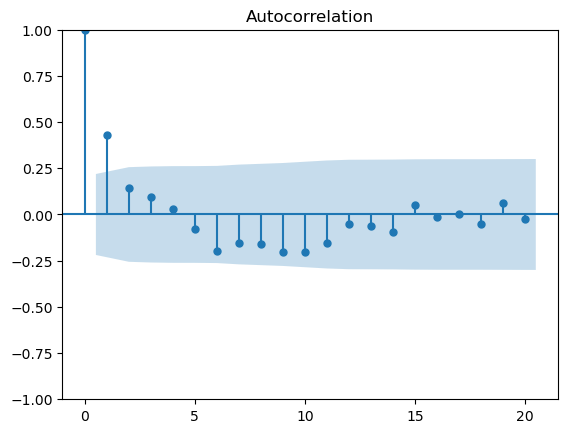

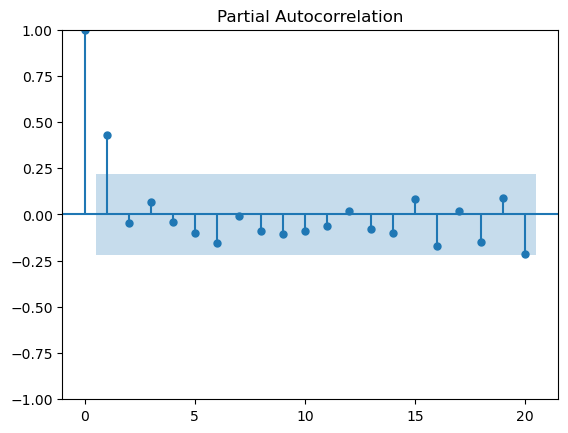

In [19]:
acf_original = plot_acf(df)
pacf_original = plot_pacf(df)
adf_result = adfuller(df)
adf_statistic = adf_result[0]      # Test statistic
p_value = adf_result[1]             # p-value
used_lags = adf_result[2]           # Number of lags used
n_observations = adf_result[3]      # Number of observations
critical_values = adf_result[4]     # Critical values
ic_best = adf_result[5]              # Information criteria
print("Augmented Dickey-Fuller Test Results:")
print(f"Test Statistic: {adf_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Lags Used: {used_lags}")
print(f"Number of Observations: {n_observations}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value:.4f}")
print(f"Information Criteria: {ic_best}")

In [20]:
def arima_bic(AR, MA, I, data):
    model_curr = ARIMA(data, order=(AR, I, MA))
    model_fit_curr = model_curr.fit()
    bic = model_fit_curr.bic
    return bic
data = df
ARmax = 6
Imax = 1
MAmax = 6
bics = {0: {}, 1: {}}
for ar in range(0, ARmax + 1):
    for i in range(0, Imax + 1):
        for ma in range(0, MAmax + 1):
            bic = arima_bic(ar, ma, i, data)  
            bics[i][(ar, ma)] = bic

C:\Users\apagano\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\apagano\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\apagano\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\apagano\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive para

BIC values for I=0: {(0, 0): 61.27928036082585, (0, 1): 50.453671222005184, (0, 2): 54.146786766082286, (0, 3): 58.03942169092451, (0, 4): 62.048123527366236, (0, 5): 65.91418023398322, (0, 6): 68.97524604899208, (1, 0): 49.69400238693717, (1, 1): 53.845775790339786, (1, 2): 58.05044575894861, (1, 3): 58.39981654566752, (1, 4): 61.58071433902711, (1, 5): 68.4174704961977, (1, 6): 66.90603156823232, (2, 0): 53.91952821879445, (2, 1): 56.001957278688764, (2, 2): 52.29389180264427, (2, 3): 51.47975937747441, (2, 4): 64.60271869488835, (2, 5): 68.69382968380646, (2, 6): 70.6580462098905, (3, 0): 57.9227267880933, (3, 1): 62.264559284337416, (3, 2): 60.93323045419777, (3, 3): 56.463620087821376, (3, 4): 60.50691141607497, (3, 5): 75.43432835181784, (3, 6): 82.2785572875373, (4, 0): 62.177577867603254, (4, 1): 56.86141683430638, (4, 2): 65.26846741367902, (4, 3): 74.31649284268768, (4, 4): 76.03202304725224, (4, 5): 80.70150452659863, (4, 6): 79.42960231217367, (5, 0): 65.63619623175939, (5,

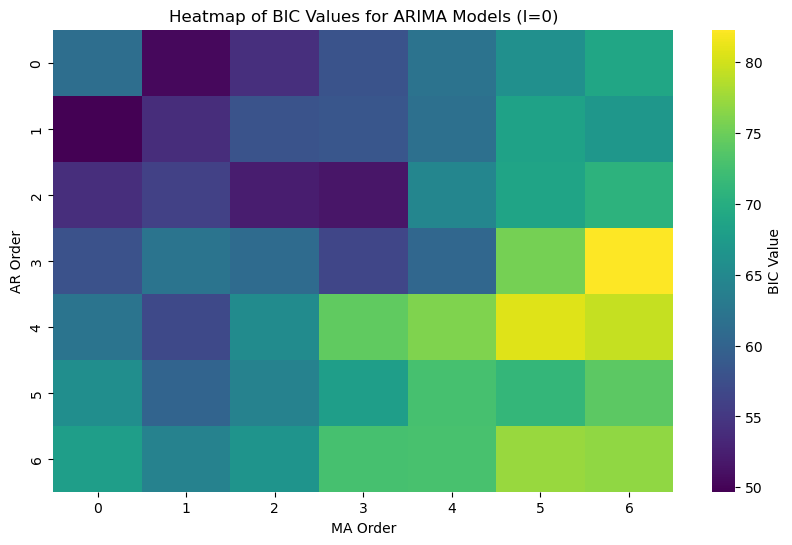

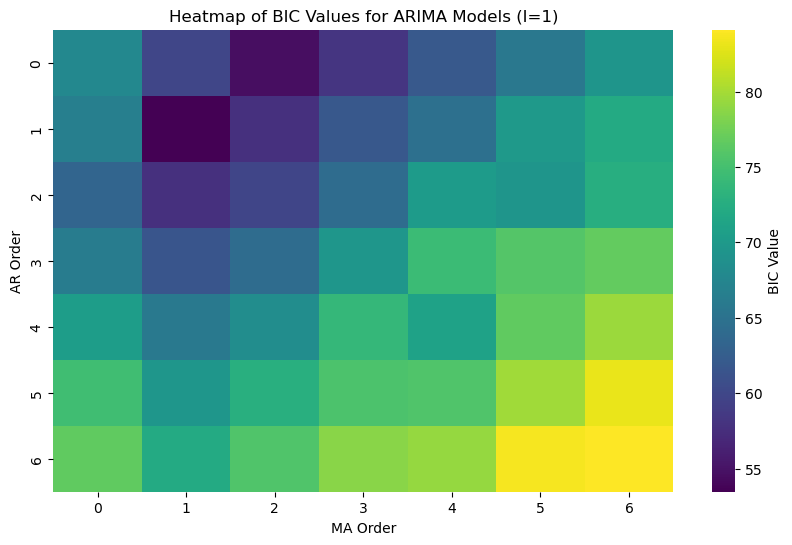

In [21]:
min_bic_key_0 = min(bics[0], key=bics[0].get)
min_bic_value_0 = bics[0][min_bic_key_0]
ARmin_0 = min_bic_key_0[0]
MAmin_0 = min_bic_key_0[1]
min_bic_key_1 = min(bics[1], key=bics[1].get)
min_bic_value_1 = bics[1][min_bic_key_1]
ARmin_1 = min_bic_key_1[0]
MAmin_1 = min_bic_key_1[1]
print(f"BIC values for I=0: {bics[0]}")
print(f"Minimum BIC for I=0: {min_bic_value_0} for AR: {ARmin_0}, MA: {MAmin_0}")
print(f"BIC values for I=1: {bics[1]}")
print(f"Minimum BIC for I=1: {min_bic_value_1} for AR: {ARmin_1}, MA: {MAmin_1}")
bics_df_0 = pd.DataFrame(np.zeros((ARmax + 1, MAmax + 1)), index=range(ARmax + 1), columns=range(MAmax + 1))
bics_df_1 = pd.DataFrame(np.zeros((ARmax + 1, MAmax + 1)), index=range(ARmax + 1), columns=range(MAmax + 1))
for (ar, ma), bic in bics[0].items():
    bics_df_0.at[ar, ma] = bic
for (ar, ma), bic in bics[1].items():
    bics_df_1.at[ar, ma] = bic
plt.figure(figsize=(10, 6))
sns.heatmap(bics_df_0, annot=False, cmap="viridis", cbar_kws={'label': 'BIC Value'})
plt.title('Heatmap of BIC Values for ARIMA Models (I=0)')
plt.xlabel('MA Order')
plt.ylabel('AR Order')
plt.show()
# Plotting the heatmap for I=1
plt.figure(figsize=(10, 6))
sns.heatmap(bics_df_1, annot=False, cmap="viridis", cbar_kws={'label': 'BIC Value'})
plt.title('Heatmap of BIC Values for ARIMA Models (I=1)')
plt.xlabel('MA Order')
plt.ylabel('AR Order')
plt.show()
model_0 = ARIMA(data, order=(ARmin_0, 0, MAmin_0))
model_fit_0 = model_0.fit()
model_1 = ARIMA(data, order=(ARmin_1, 1, MAmin_1))
model_fit_1 = model_1.fit()

                                   SARIMAX Results                                   
Dep. Variable:     IDM_Standard_Price_UscKWh   No. Observations:                   80
Model:                        ARIMA(1, 0, 0)   Log Likelihood                 -18.274
Date:                       Tue, 05 Nov 2024   AIC                             42.548
Time:                               23:34:57   BIC                             49.694
Sample:                           01-31-2018   HQIC                            45.413
                                - 08-31-2024                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0786      0.067    120.716      0.000       7.947       8.210
ar.L1          0.4229      0.114      3.725      0.000       0.200       0.

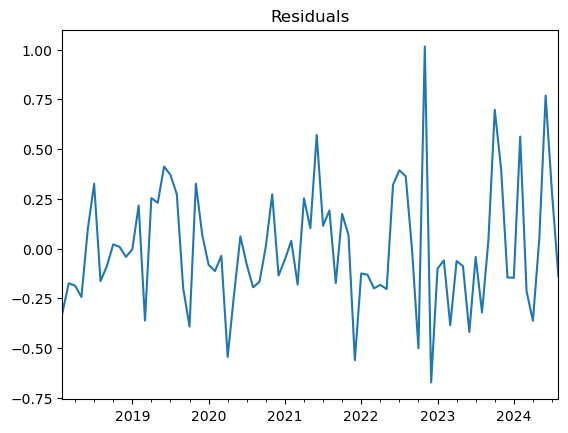

In [22]:
model = ARIMA(data, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.summary())
residuals = model_fit.resid[1:]
residuals.plot(title='Residuals')
plt.show()

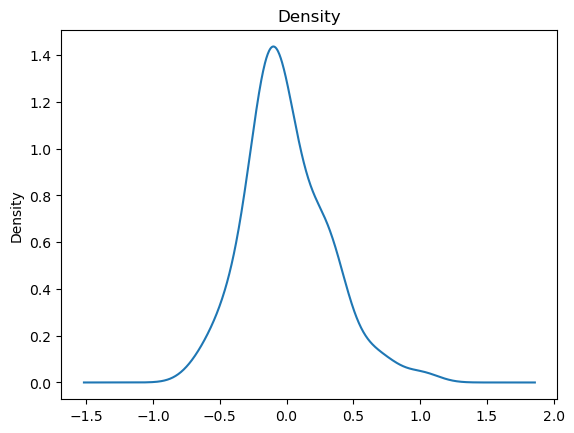

In [23]:
residuals.plot(title='Density', kind='kde')
plt.show()

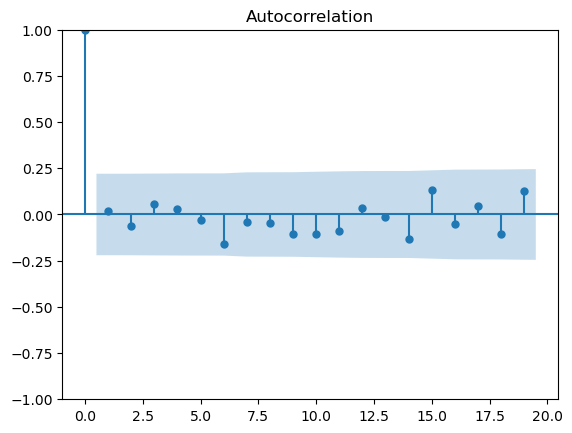

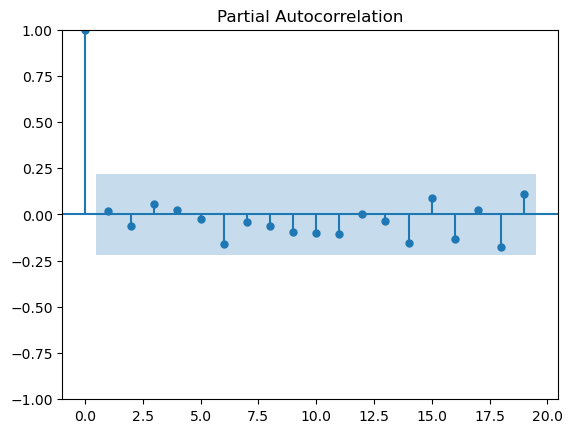

In [24]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

            forecast  lower_ci  upper_ci
2024-09-30  8.125167  7.529954  8.720379
2024-10-31  8.098306  7.452066  8.744546
2024-11-30  8.086947  7.432002  8.741893
2024-12-31  8.082144  7.425654  8.738635
2025-01-31  8.080113  7.423348  8.736879
...              ...       ...       ...
2034-04-30  8.078625  7.421799  8.735451
2034-05-31  8.078625  7.421799  8.735451
2034-06-30  8.078625  7.421799  8.735451
2034-07-31  8.078625  7.421799  8.735451
2034-08-31  8.078625  7.421799  8.735451

[120 rows x 3 columns]
            IDM_Standard_Price_UscKWh     forecast     lower_ci     upper_ci
2018-01-31                     3046.5          NaN          NaN          NaN
2018-02-28                     2273.0          NaN          NaN          NaN
2018-03-31                     2335.5          NaN          NaN          NaN
2018-04-30                     2335.0          NaN          NaN          NaN
2018-05-31                     2205.0          NaN          NaN          NaN
...                   

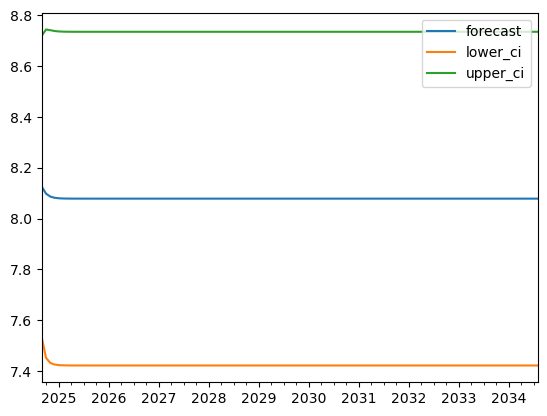

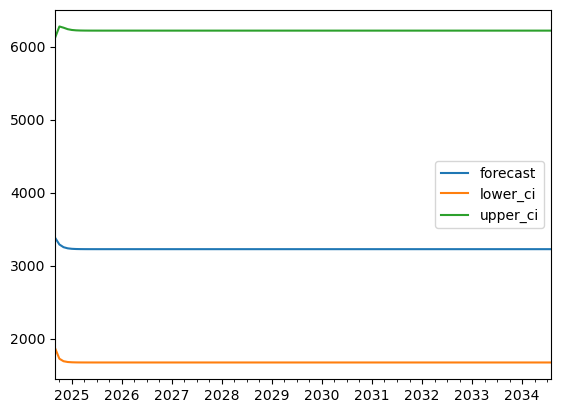

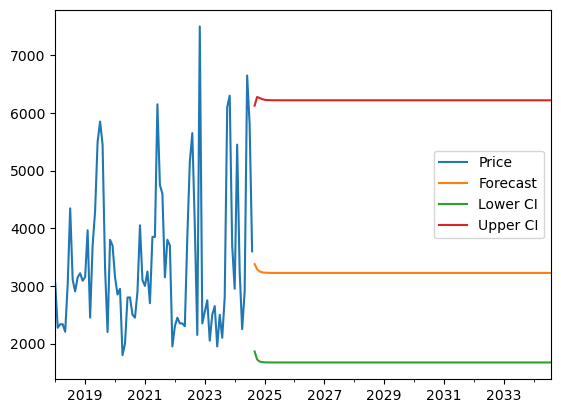

In [28]:

forecast1 = model_fit.get_forecast(steps=120)
forecast_values = forecast1.predicted_mean
confidence_intervals = forecast1.conf_int()

forecast_df = pd.DataFrame({
    'forecast': forecast_values,
    'lower_ci': confidence_intervals.iloc[:, 0],
    'upper_ci': confidence_intervals.iloc[:, 1],
})
    

print(forecast_df)
        
forecast_df.plot()
forecast_df_transformed = forecast_df.apply(np.exp)
df_combined = pd.concat([df, forecast_df], axis=0)
df_combined_transformed = df_combined.apply(np.exp)
forecast_df_transformed.plot()
df_combined_transformed.plot()
plt.legend(["Price", "Forecast", "Lower CI", "Upper CI"])
print(df_combined_transformed)